### CUNY Data 620 - Web Analytics, Summer 2020
**Group Homework Assignment 4**  
**Prof**: Alain Ledon  
**Members**: Misha Kollontai, Amber Ferger, Zach Alexander, Subhalaxmi Rout

### Instructions  

Here is a dataset that shows a simple 2-mode network - the attendance of 18 Southern Women at 14 social events:

1) [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis). Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms. 

2) [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat).  

3) Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html  


What can you infer about the relationships between (1) the women, and (2) the social events?  

### Import Packages

In [1]:
import networkx as nx
from networkx.algorithms import bipartite as bi
import numpy as np
import matplotlib.pyplot as plt
import os
import string
import pandas as pd

### Import Data

We utilized the NetworkX documentation [here](https://networkx.github.io/documentation/networkx-1.9.1/examples/algorithms/davis_club.html) in order to properly load the .dat file and create a bipartite graph. Our functions for doing this are below with comments on each step:

In [2]:
g=nx.generators.empty_graph()

In [3]:
# this function creates an emtpy graph, and then 
# utilizing the contents of the .dat file to set up our graph
# for analysis

def davis_club_graph(create_using=None, **kwds):
    nwomen=14
    nclubs=18
    g=nx.generators.empty_graph(nwomen+nclubs,create_using=create_using,**kwds)
    g.clear()
    g.name="Davis Southern Club Women"
    
    # loading the women's names
    women="""\
EVELYN
LAURA
THERESA
BRENDA
CHARLOTTE
FRANCES
ELEANOR
PEARL
RUTH
VERNE
MYRNA
KATHERINE
SYLVIA
NORA
HELEN
DOROTHY
OLIVIA
FLORA"""

    # loading the club names
    clubs="""\
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14"""

    # loading the interaction matrix
    davisdat="""\
1 1 1 1 1 1 0 1 1 0 0 0 0 0
1 1 1 0 1 1 1 1 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1 0 0 0 0 0
1 0 1 1 1 1 1 1 0 0 0 0 0 0
0 0 1 1 1 0 1 0 0 0 0 0 0 0
0 0 1 0 1 1 0 1 0 0 0 0 0 0
0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 1 0 1 1 0 0 0 0 0
0 0 0 0 1 0 1 1 1 0 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 1 1
0 0 0 0 0 0 1 1 1 1 0 1 1 1
0 0 0 0 0 1 1 0 1 1 1 1 1 1
0 0 0 0 0 0 1 1 0 1 1 1 1 1
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0"""


    # creating a list of women names
    w={}
    n=0
    for name in women.split('\n'):
        w[n]=name
        n+=1

    # creating a list of club names
    c={}
    n=0
    for name in clubs.split('\n'):
        c[n]=name
        n+=1

    # parsing our interactions matrix, adding edges
    row=0
    for line in davisdat.split('\n'):
        thisrow=list(map(int,line.split(' ')))
        for col in range(0,len(thisrow)):
            if thisrow[col]==1:
                g.add_edge(w[row],c[col])
        row+=1
    return (g,list(w.values()),list(c.values()))

Now, we can confirm that our graph is now bipartite after successfully loading in the edges and nodes from our social events and women.

In [4]:
nx.is_bipartite(g)

True

In [5]:
# return graph and women and clubs lists
(g,women,clubs)=davis_club_graph()

In [59]:
g.edges

EdgeView([('EVELYN', 'E1'), ('EVELYN', 'E2'), ('EVELYN', 'E3'), ('EVELYN', 'E4'), ('EVELYN', 'E5'), ('EVELYN', 'E6'), ('EVELYN', 'E8'), ('EVELYN', 'E9'), ('E1', 'LAURA'), ('E1', 'BRENDA'), ('E2', 'LAURA'), ('E2', 'THERESA'), ('E3', 'LAURA'), ('E3', 'THERESA'), ('E3', 'BRENDA'), ('E3', 'CHARLOTTE'), ('E3', 'FRANCES'), ('E4', 'THERESA'), ('E4', 'BRENDA'), ('E4', 'CHARLOTTE'), ('E5', 'LAURA'), ('E5', 'THERESA'), ('E5', 'BRENDA'), ('E5', 'CHARLOTTE'), ('E5', 'FRANCES'), ('E5', 'ELEANOR'), ('E5', 'RUTH'), ('E6', 'LAURA'), ('E6', 'THERESA'), ('E6', 'BRENDA'), ('E6', 'FRANCES'), ('E6', 'ELEANOR'), ('E6', 'PEARL'), ('E6', 'NORA'), ('E8', 'LAURA'), ('E8', 'THERESA'), ('E8', 'BRENDA'), ('E8', 'FRANCES'), ('E8', 'ELEANOR'), ('E8', 'PEARL'), ('E8', 'RUTH'), ('E8', 'VERNE'), ('E8', 'MYRNA'), ('E8', 'KATHERINE'), ('E8', 'SYLVIA'), ('E8', 'HELEN'), ('E8', 'DOROTHY'), ('E9', 'THERESA'), ('E9', 'PEARL'), ('E9', 'RUTH'), ('E9', 'VERNE'), ('E9', 'MYRNA'), ('E9', 'KATHERINE'), ('E9', 'SYLVIA'), ('E9', 'NO

In [7]:
g.nodes

NodeView(('EVELYN', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9', 'LAURA', 'E7', 'THERESA', 'BRENDA', 'CHARLOTTE', 'FRANCES', 'ELEANOR', 'PEARL', 'RUTH', 'VERNE', 'E12', 'MYRNA', 'E10', 'KATHERINE', 'E13', 'E14', 'SYLVIA', 'NORA', 'E11', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA'))

##### Graph of social events and women

Now that we've successfully loaded our data and set up our nodes and edges into a bipartite structure with NetworkX, we can generate our first visualization of the network.

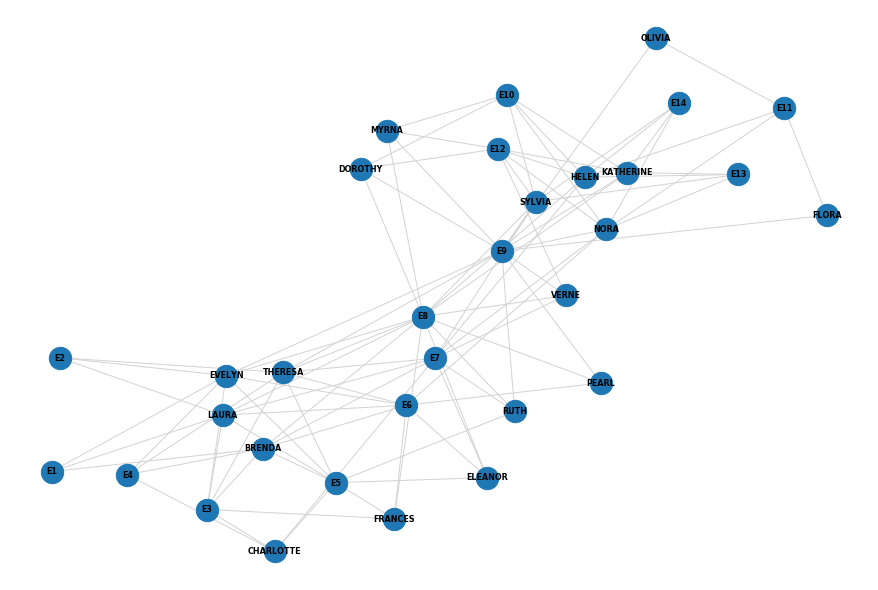

In [60]:
nx.draw_spring(g, with_labels = True, node_size=500, font_weight = 'bold', edge_color='lightgray', font_size=8)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

As we can see from above, certain social events and women appear to be more central in the network. We can investigate further by creating affiliation networks between our social events and women.

##### Affiliation network of social events

With our bipartite graph saved as a graph object, we can start to run some analyses. First, we can put together an affiliation network of the social events:

In [9]:
c = bi.weighted_projected_graph(g, clubs, ratio=False)

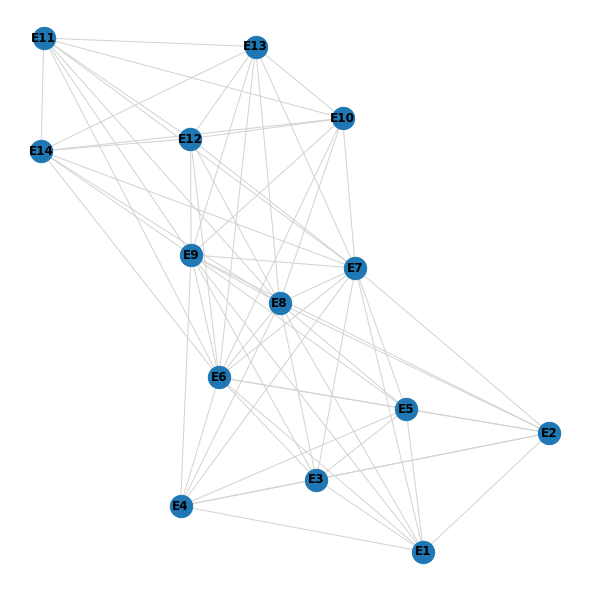

In [10]:
nx.draw(c, with_labels = True, font_weight='bold', node_size=500, edge_color='lightgray', font_size=12)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

##### Affiliation network of women

And we can also put together an affiliation network of the women:

In [11]:
w = bi.weighted_projected_graph(g, women, ratio=False)

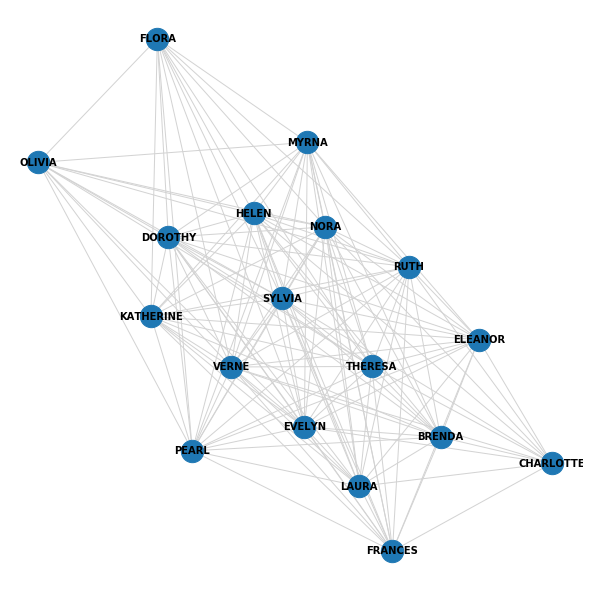

In [12]:
nx.draw(w, with_labels = True, font_weight='bold', node_size=500, edge_color='lightgray', font_size=10)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

##### Centrality measures of the women in the network

In [13]:
def sorted_map(map):
    ms = sorted(map.items(), key=lambda k_v: -k_v[1])
    return ms

In [14]:
d = nx.degree_centrality(w)
ds = sorted_map(d)

In [15]:
b = nx.betweenness_centrality(w)
bs = sorted_map(b)

In [16]:
e = nx.eigenvector_centrality(w)
es = sorted_map(e)

In [17]:
women = []
value_bs = []
value_ds = []
value_es = []

bs = sorted(bs)
ds = sorted(ds)
es = sorted(es)

for i in bs:
    women.append(i[0])
    value_bs.append(i[1])

for i in ds:
    value_ds.append(i[1])
    
for i in es:
    value_es.append(i[1])

pd.DataFrame({'name': sorted(women), 'degree_centrality': value_ds, 'betweenness_centrality': value_bs, 'eigenvector_centrality': value_es})

,name,degree_centrality,betweenness_centrality,eigenvector_centrality
0,BRENDA,0.882353,0.002674,0.230973
1,CHARLOTTE,0.647059,0.000000,0.172527
2,DOROTHY,0.941176,0.005348,0.243157
3,ELEANOR,0.882353,0.002674,0.230973
4,EVELYN,1.000000,0.010122,0.253524
5,FLORA,0.705882,0.000000,0.187639
6,FRANCES,0.882353,0.002674,0.230973
7,HELEN,1.000000,0.010122,0.253524
8,KATHERINE,0.941176,0.005348,0.243157
9,LAURA,0.882353,0.002674,0.230973


From our centrality measures, it appears that Evelyn, Theresa, Ruth, Verne, Sylvia, Nora, and Helen are very well connected in the network -- their degree centrality and betweenness centrality scores are the highest. It would appear that these women create bridges in connections with others in the network as well, given their betweenness centrality values. Since these seven women also seem to be connected with one another, their bond strengthens their eigenvector centrality values. Charlotte, Flora, and Olivia appear to be less connected and operate as boundary spanners, with lower overall degree centrality and a betweeness centrality of 0.

In [18]:
d = nx.degree_centrality(c)
ds = sorted_map(d)

In [19]:
b = nx.betweenness_centrality(c)
bs = sorted_map(b)

In [20]:
e = nx.eigenvector_centrality(c)
es = sorted_map(e)

In [21]:
clubs = []
value_bs = []
value_ds = []
value_es = []

bs = sorted(bs)
ds = sorted(ds)
es = sorted(es)

for i in bs:
    clubs.append(i[0])
    value_bs.append(i[1])

for i in ds:
    value_ds.append(i[1])
    
for i in es:
    value_es.append(i[1])

pd.DataFrame({'name': sorted(clubs), 'degree_centrality': value_ds, 'betweenness_centrality': value_bs, 'eigenvector_centrality': value_es})

,name,degree_centrality,betweenness_centrality,eigenvector_centrality
0,E1,0.615385,0.000000,0.232251
1,E10,0.615385,0.000000,0.232251
2,E11,0.615385,0.000000,0.232251
3,E12,0.615385,0.000000,0.232251
4,E13,0.615385,0.000000,0.232251
5,E14,0.615385,0.000000,0.232251
6,E2,0.615385,0.000000,0.232251
7,E3,0.615385,0.000000,0.232251
8,E4,0.615385,0.000000,0.232251
9,E5,0.615385,0.000000,0.232251


From our centrality calculations of our social events, we can see that certain social events were more central to the network than others -- building more connections between nodes. We will investigate this further below.

##### Social Events E6, E7, E8, and E9

After looking at our centrality measures, we thought it would be helpful to create bipartite graphs of women membership at these social events. We'll start with those with high centrality measures:

In [22]:
h = g.subgraph(['LAURA', 'THERESA', 'BRENDA', 'FRANCES', 'ELEANOR',
                'PEARL', 'RUTH', 'VERNE', 'MYRNA', 'KATHERINE',
                'SYLVIA', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA',
                'NORA', 'CHARLOTTE', 'EVELYN', 'E6', 'E7', 'E8', 'E9'])

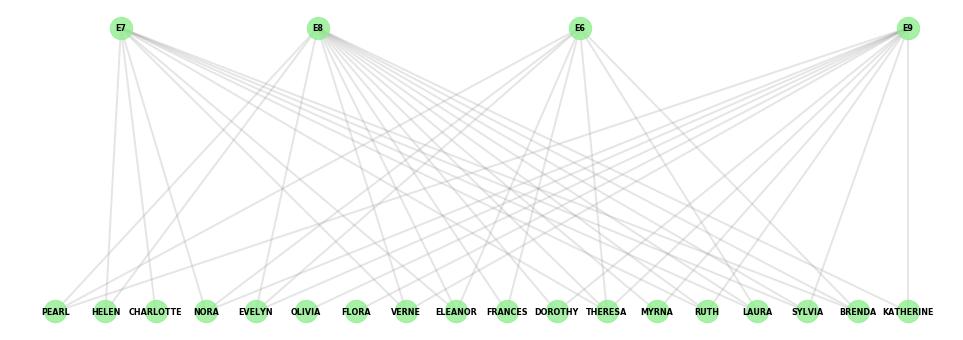

In [38]:
pos = nx.bipartite_layout(h, c, align='horizontal')

nx.draw_networkx_nodes(h, pos,
                       nodelist=h.nodes,
                       node_color='lightgreen',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_edges(h, pos, width=2, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(h, pos, font_weight = 'bold', font_size=8)
plt.rcParams['figure.figsize'] = [17, 6]
plt.axis('off')
plt.show()

As we can see above from our bipartite layout of our social events and women, there are many members that make up these four clubs of E6, E7, E8, and E9. We were given a clue into this from our centrality measures, and it's interesting to see that these social events tend to be less exclusive -- allowing for an opportunity for women in our sample to build a stronger association with one another. Every single woman in our sample attended one of these social events.

##### Social Events E1, E2, E3, E4, and E5

These social events appeared to be more exclusive, with less membership. As we can see from the graph below, some women in our network didn't attend any one of these events. From our visual, we can see that these were attended by many of the same women, including: 

+ Attended all five: Evelyn
+ Attended three or four: Laura, Theresa, Brenda, Charlotte
+ Attended one or two: Frances, Eleanor, Ruth

In [24]:
l = g.subgraph(['LAURA', 'THERESA', 'BRENDA', 'FRANCES', 'ELEANOR',
                'PEARL', 'RUTH', 'VERNE', 'MYRNA', 'KATHERINE',
                'SYLVIA', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA',
                'NORA', 'CHARLOTTE', 'EVELYN', 'E1', 'E2', 'E3', 'E4', 'E5'])

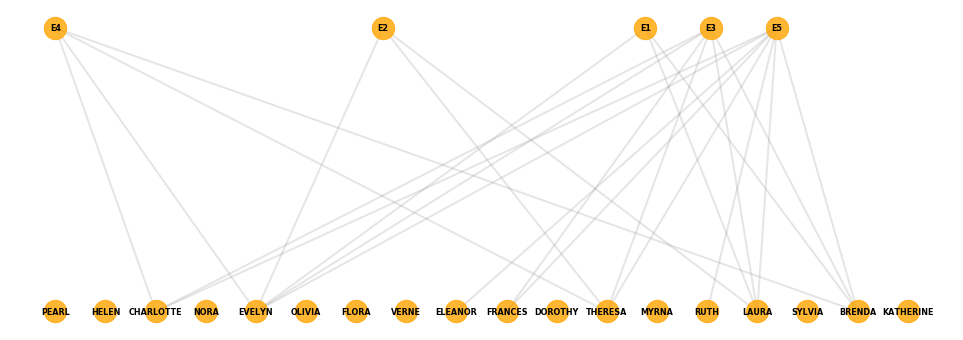

In [25]:
pos = nx.bipartite_layout(l, c, align='horizontal')

nx.draw_networkx_nodes(l, pos,
                       nodelist=l.nodes,
                       node_color='orange',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_edges(l, pos, width=2, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(l, pos, font_weight = 'bold', font_size=8)
plt.axis('off')
plt.rcParams['figure.figsize'] = [17, 6]
plt.show()

##### Social Events E10, E11, E12, E13, and E14
These social events also appeared to be more exclusive, with less membership. As we can see from the graph below, some women in our network didn't attend any one of these events either. From our visual, we can see that these were attended by many of the same women, including: 

+ Attended all five: Nora
+ Attended three or four: Helen, Katherine, Sylvia
+ Attended one or two: Myrna, Verne, Dorothy, Olivia, Flora

In [26]:
q = g.subgraph(['LAURA', 'THERESA', 'BRENDA', 'FRANCES', 'ELEANOR',
                'PEARL', 'RUTH', 'VERNE', 'MYRNA', 'KATHERINE',
                'SYLVIA', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA',
                'NORA', 'CHARLOTTE', 'EVELYN', 'E10', 'E11', 'E12', 'E13', 'E14'])

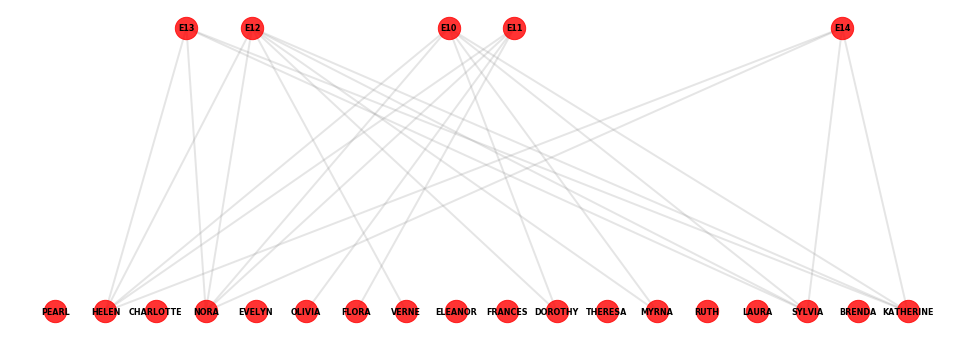

In [27]:
pos = nx.bipartite_layout(q, c, align='horizontal')

nx.draw_networkx_nodes(q, pos,
                       nodelist=q.nodes,
                       node_color='red',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_edges(q, pos, width=2, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(q, pos, font_size=8, font_weight='bold')
plt.rcParams['figure.figsize'] = [17, 6]
plt.axis('off')
plt.show()

##### Social events network graph

Add weight to the edge of the social events graph.

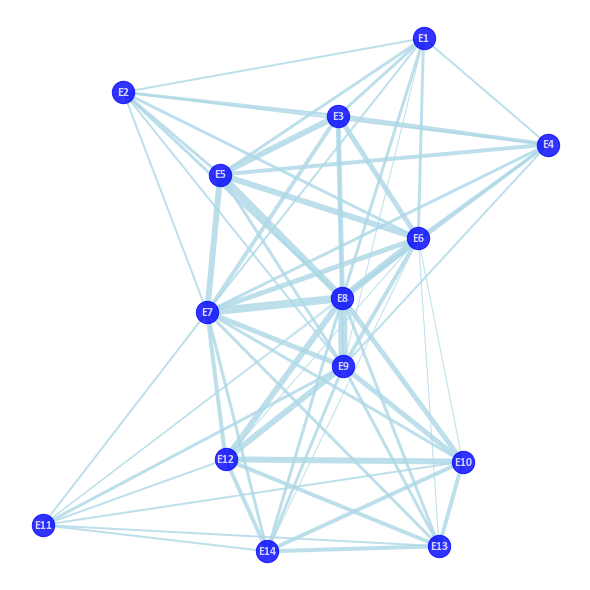

In [41]:
# add weight
weights_c= [edata['weight'] for f,to,edata in c.edges(data=True)]
# draw the graph
nx.draw(c,width=weights_c, edge_color="lightblue", node_color="blue", with_labels=True, node_size=500, font_color='white', font_weight='bold', font_size=12, font_family="calibri", 
                alpha=0.8)
plt.rcParams['figure.figsize'] = [8, 8]

In the Spring layout graph can clearly see events like E6, E7, E8, E9 are placed in the center of the graph and busiest events. 

Draw the graph in circular layout.

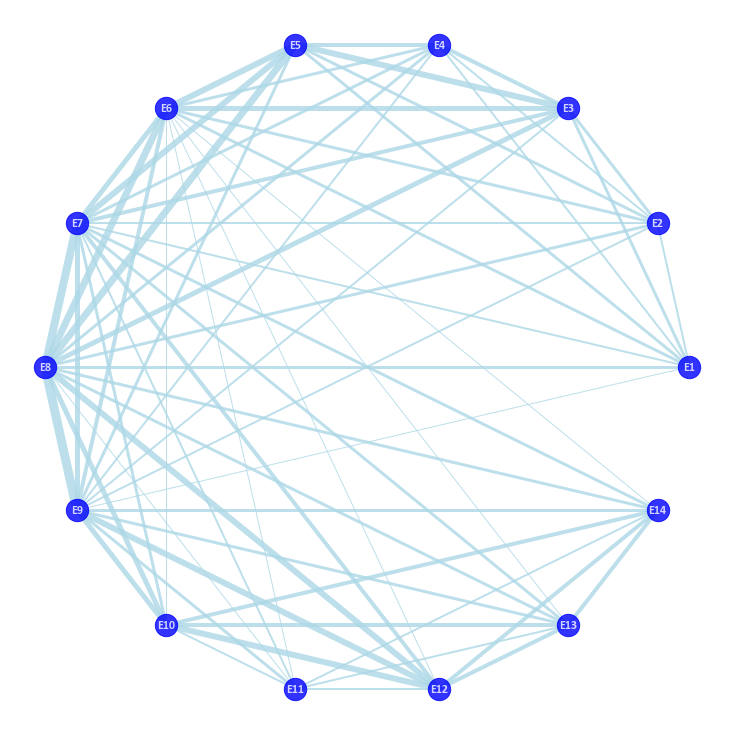

In [44]:
# draw the graph
nx.draw_circular(c,width=weights_c, edge_color="lightblue", font_color='white', font_weight='bold', node_color="blue", with_labels=True, node_size=500, font_size=12, font_family="calibri", 
                alpha=0.8)
plt.rcParams['figure.figsize'] = [10, 10]

In the circular layout, we can clearly find that events E6, E7, E8, and E9 more crowded than other events. Additionally, event E8 is to stand out all other events. E8 shows more weight connected to its edges. 

##### Women network graph

Add weight to the edge of the women graph.

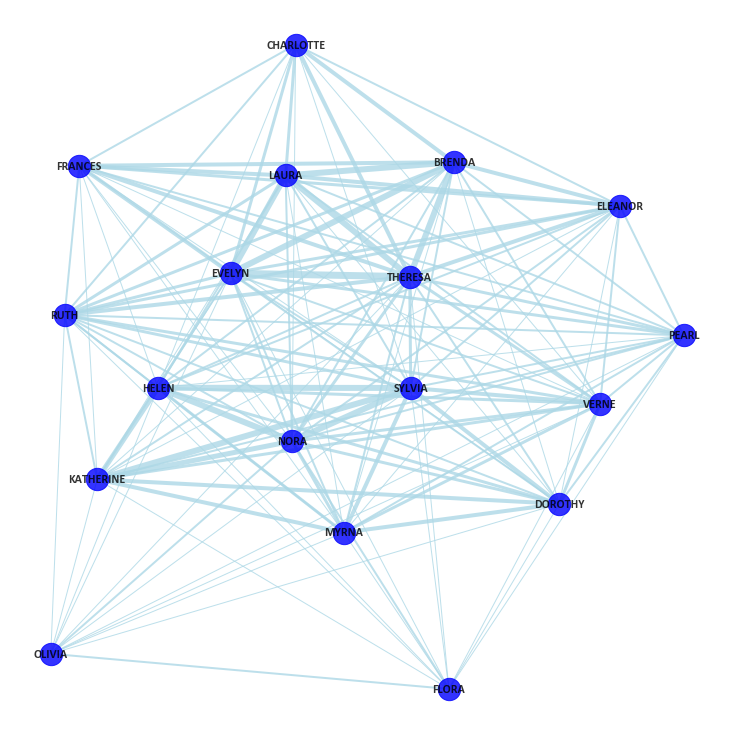

In [54]:
# add weight
weights_w= [edata['weight'] for f,to,edata in w.edges(data=True)]
# draw the graph
nx.draw(w,width=weights_w, edge_color="lightblue", node_color="blue", with_labels=True, node_size=500, font_size=12, font_family="calibri", 
                alpha=0.8, font_weight='bold')
plt.rcParams['figure.figsize'] = [10, 10]

From the sprong layout, we can see Sylvia, Teresa, Evelyn, Nora, Helen, and Laura placed in the middle of the graph and strongly connected in the network. Flora and Olivia appear to be less connected. 

Draw the same graph in circular layout.

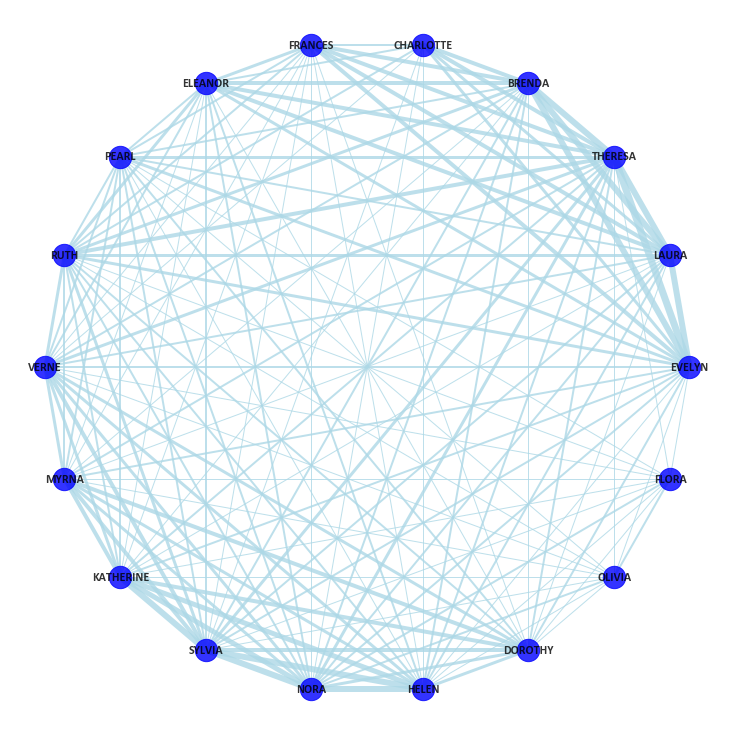

In [55]:
# draw the graph
nx.draw_circular(w,width=weights_w, edge_color="lightblue", node_color="blue", with_labels=True, node_size=500, font_size=12, font_family="calibri", 
                alpha=0.8, font_weight='bold')
plt.rcParams['figure.figsize'] = [10, 10]

From the above circular layout, we can see Sylva, Nora, Evelyn, Teresa, and Laura are strongly connected. However, Flora and Olivia seem very isolated in their social interactions compared to the rest of the network.

##### Additional inferences about the social events

In summary from our bipartite graphs above, certain social events appeared to be more exclusive than others, and demonstrated that some events operated more in 'cliques'. Events E6, E7, E8, and E9, tended to be more inclusive. A good way to demonstrate this visually would be from a clique layout of our graph of events:

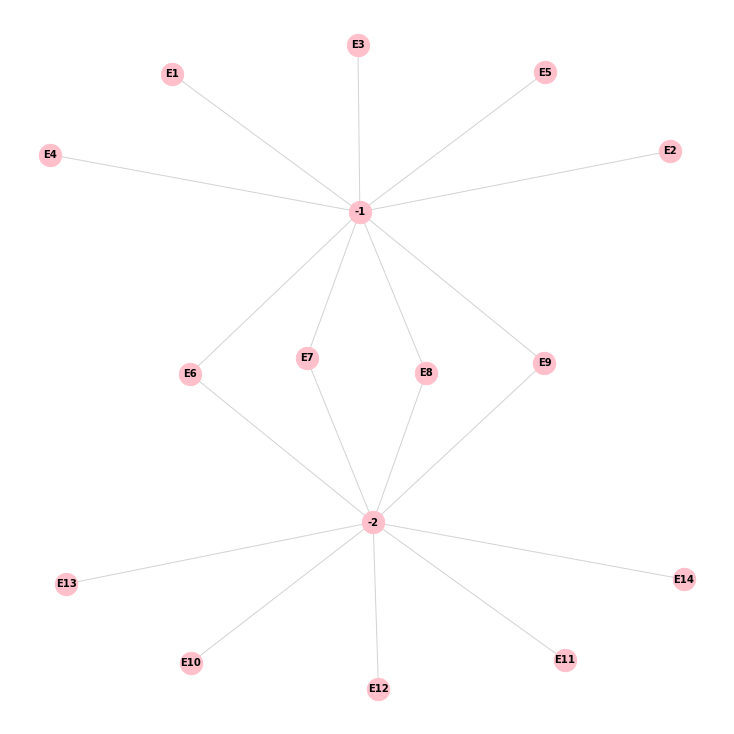

In [32]:
t = nx.make_clique_bipartite(c)
nx.draw(t, with_labels=True, font_size=10, font_weight='bold', edge_color='lightgray', node_size=500, node_color='pink')
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

As we can see from above, events E1 to E5 appeared to include the same subset of women, events E10 to E14 appeared to include the same subset of different women, and events E6 to E9 were more inclusive of all women in our network.

##### Additional Inferences about relationships between women

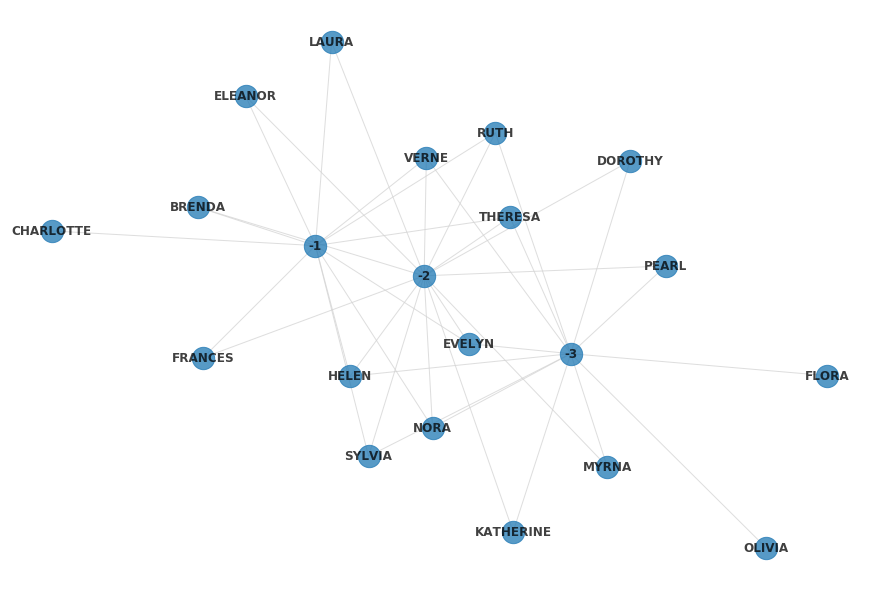

In [57]:
tw = nx.make_clique_bipartite(w)
nx.draw_spring(tw, with_labels=True, font_size=12, font_weight='bold', edge_color='lightgray', node_size=500, alpha=0.75)
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

We can see from a bit of our analysis that Charlotte, Olivia, and Flora tend to be very isolated in their social interactions compared to the rest of the network. We also notice that women such as Theresa, Verne, Ruth, Sylvia, and Helen seem to reach beyond some of the cliques that have formed connections with many other women in the network. We can see this from their betweenness centrality values, as well as visually from where they are located on our graphs.

##### Conclusion

**Social Events:**
<ol>
<li>Social events E6, E7, E8, and E9 are the most busiest events. Among these E8 is most crowded one.<br>
<li>Social events E1, E13, and E14 are the less crowded events.
</ol>

**Women**:
<ol>
<li>Theresa attended most of the social events.
<li>Evelyn, Sylvia, Laura, and Nora are attended more events and more connected women in the network but not necessarily in all the same social events.
<li>Charlotte, Flora and Olivia are very isolated in the network.
</ol>

##### Video
We also recorded a short video outlining the work that went into this assignment: https://www.youtube.com/watch?v=V_DhRHdS0QI